# 2020: A Year to Scrape Through

This Notebook is an exercise in scraping with BeautifulSoup illustrated in more detail on my blog at this link: 

https://littlehelperscorner.wordpress.com/2021/02/01/2020-a-year-to-scrape-through/

It consists of two parts: in part 1 I scrape and plot a couple of time series from Yahoo Finance; in part 2 I give some aggregate statistics for the S&P 500 constituents merging data from Wikipedia and Yahoo Finance.

### Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import requests, re, json
import seaborn as sns
from matplotlib import pyplot as plt

from scipy import stats 
from bs4 import BeautifulSoup
from datetime import datetime

## Part 1: A look at asset classes performance

### Helper function to download historical prices

In [20]:
def get_data(ticker, dt_beg, dt_end):
    beg_epoch = str(int((dt_beg - datetime(1970, 1, 1)).total_seconds()))
    end_epoch = str(int((dt_end - datetime(1970, 1, 1)).total_seconds()))


    p = re.compile('HistoricalPriceStore":{"prices":(.*?\])')
    url_template = 'https://finance.yahoo.com/quote/TICKER/history?period1=BEGEPOCH&period2=ENDEPOCH&interval=1d&filter=history&frequency=1d&_guc_consent_skip=1566859607'

    url = url_template.replace('TICKER', ticker)
    url = url.replace('BEGEPOCH', beg_epoch)
    url = url.replace('ENDEPOCH', end_epoch)

    r = requests.get(url)
    data = json.loads(p.findall(r.text)[0])

    df = pd.DataFrame(data)
    df.date = pd.to_datetime(df.date, unit='s')
    df = df[::-1].reset_index(drop=True)
    return df.iloc[:,0:7]


### Download time series

In [22]:
sns.set_style('darkgrid')

# Equities
ticker1 = '^GSPC'
ticker2 = '^IXIC'
ticker3 = 'URTH'

# Commodities
ticker4 = 'CL=F'
ticker5 = 'HG=F'

# Rates
ticker6 = 'HYG'
ticker7 = '^FVX'

# Gold & BTC
ticker8 = 'GLD'
ticker9 = 'BTC-USD'

dt_beg = datetime(2020, 1, 1)
dt_end = datetime(2020, 12, 31)


hp1 = get_data(ticker1, dt_beg, dt_end)
hp2 = get_data(ticker2, dt_beg, dt_end)
hp3 = get_data(ticker3, dt_beg, dt_end)
hp4= get_data(ticker4, dt_beg, dt_end)
hp5 = get_data(ticker5, dt_beg, dt_end)
hp6 = get_data(ticker6, dt_beg, dt_end)
hp7 = get_data(ticker7, dt_beg, dt_end)
hp8 = get_data(ticker8, dt_beg, dt_end)
hp9 = get_data(ticker9, dt_beg, dt_end)

### Figure 1: S&P 500 vs NASDAQ

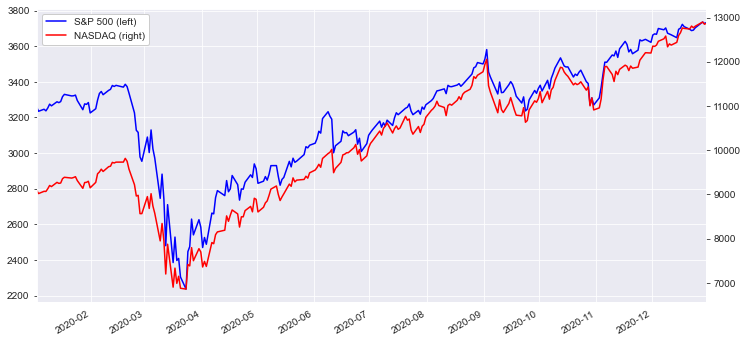

In [23]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
lab1 = ax1.plot(hp1.date, hp1.adjclose, color="blue", label="S&P 500 (left)", linestyle="-")
lab2 = ax2.plot(hp2.date, hp2.adjclose, color="red", label="NASDAQ (right)", linestyle="-")

lines = lab1 + lab2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=0, facecolor='white', framealpha=1)

ax1.margins(x=0, tight=False)
ax2.margins(x=0, tight=False)
ax2.grid(False)

plt.gcf().autofmt_xdate()
fig.set_size_inches(12, 6)

### Figure 2: S&P 500 vs MSCI World

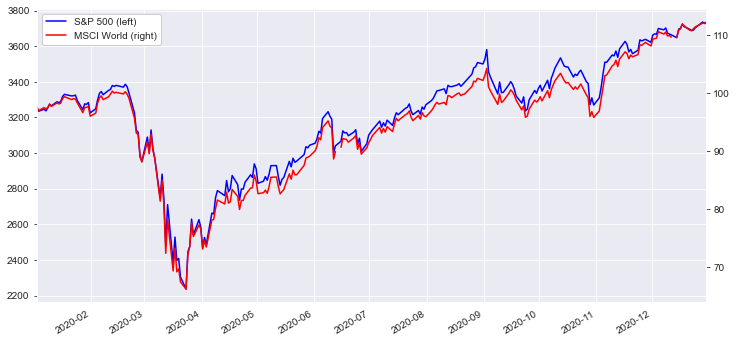

In [24]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
lab1 = ax1.plot(hp1.date, hp1.adjclose, color="blue", label="S&P 500 (left)", linestyle="-")
lab2 = ax2.plot(hp3.date, hp3.adjclose, color="red", label="MSCI World (right)", linestyle="-")

lines = lab1 + lab2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=2, facecolor='white', framealpha=1)

ax1.margins(x=0, tight=False)
ax2.margins(x=0, tight=False)
ax2.grid(False)

plt.gcf().autofmt_xdate()
fig.set_size_inches(12, 6)

### Correlation btw S&P and MSCI

In [25]:
together = pd.merge(hp1, hp3, how="inner", on=['date'])

sp = together.adjclose_x.pct_change().replace(np.nan, 0)
sp = sp.replace(np.inf, 0)

msci = together.adjclose_y.pct_change().replace(np.nan, 0)
msci = msci.replace(np.inf, 0)

stats.pearsonr(sp, msci) # returns (rho, p-value)

(0.9899541346710293, 4.071849732655883e-216)

### Figure 3: Commodities

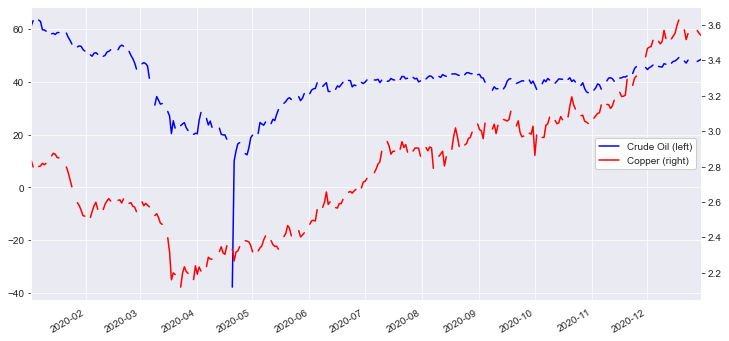

In [27]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
lab1 = ax1.plot(hp4.date, hp4.adjclose, color="blue", label="Crude Oil (left)", linestyle="-")
lab2 = ax2.plot(hp5.date, hp5.adjclose, color="red", label="Copper (right)", linestyle="-")

lines = lab1 + lab2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=7, facecolor='white', framealpha=1)

ax1.margins(x=0, tight=False)
ax2.margins(x=0, tight=False)
ax2.grid(False)

plt.gcf().autofmt_xdate()
fig.set_size_inches(12, 6)

### Figure 3: Fixed-Income

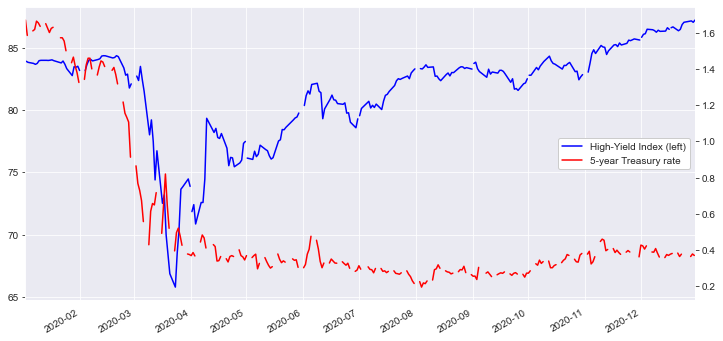

In [28]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
lab1 = ax1.plot(hp6.date, hp6.adjclose, color="blue", label="High-Yield Index (left)", linestyle="-")
lab2 = ax2.plot(hp7.date, hp7.adjclose, color="red", label="5-year Treasury rate", linestyle="-")

lines = lab1 + lab2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=7, facecolor='white', framealpha=1)

ax1.margins(x=0, tight=False)
ax2.margins(x=0, tight=False)
ax2.grid(False)

plt.gcf().autofmt_xdate()
fig.set_size_inches(12, 6)

### Figure 5: Gold and Bitcoin

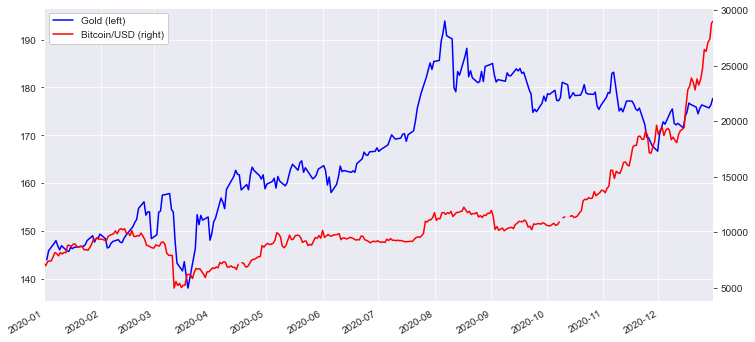

In [29]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
lab1 = ax1.plot(hp8.date, hp8.adjclose, color="blue", label="Gold (left)", linestyle="-")
lab2 = ax2.plot(hp9.date, hp9.adjclose, color="red", label="Bitcoin/USD (right)", linestyle="-")

lines = lab1 + lab2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc=2, facecolor='white', framealpha=1)


ax1.margins(x=0, tight=False)
ax2.margins(x=0, tight=False)
ax2.grid(False)

plt.gcf().autofmt_xdate()
fig.set_size_inches(12, 6)

## Part 2: A peek into the S&P 500

### Dowload full constituent list from Wikipedia

In [2]:
URL = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
page = requests.get(URL)
page.raise_for_status()
soup = BeautifulSoup(page.content, 'html.parser')

In [3]:
data = []
table = soup.find('table')
table_body = table.find('tbody')
rows = table_body.find_all('tr')

for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])
df = pd.DataFrame(data[1:], columns = ['Symbol', 'Security', 'SEC filings', 'GICS Sector', 'GICS Sub-Industry', 'Headquartes Location', 'Date first added', 'CIK', 'Founded'])
#df['Date first added'] = pd.to_datetime(df['Date first added'])
df['Symbol'].replace('\.','-', regex=True, inplace=True)
df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquartes Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,0000066740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,0001041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,0000877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,0001136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,0000109380,1873


### Download current multiples from YahooFinance

In [4]:
URL_template = 'https://finance.yahoo.com/quote/XXX/key-statistics?p=XXX'
current_data = pd.DataFrame()

for symbol in df.Symbol:
    URL = URL_template.replace('XXX', symbol)
    page = requests.get(URL)
    page.raise_for_status()
    soup = BeautifulSoup(page.content, 'html.parser')

    data = []
    table = soup.find('table')
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')

    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele])

    keys = ['Market Cap', 'EV', 'PE (ttm)', 'PE (fwd)', 'PEG', 'P/S (ttm)', 'P/B (mrq)', 'EV/Sales', 'EV/EBITDA']
    values = [[data[k][1]] for k in range(9)]
    row = pd.DataFrame(dict(zip(keys, values)))
    row.insert(0, column='Symbol', value=symbol)
    current_data = current_data.append(row)

In [5]:
current_data.reset_index(inplace=True)
current_data.drop(columns=['index'], inplace=True)
current_data.head()

,Symbol,Market Cap,EV,PE (ttm),PE (fwd),PEG,P/S (ttm),P/B (mrq),EV/Sales,EV/EBITDA
0,MMM,101.49B,115.5B,18.99,16.83,2.52,3.15,7.85,3.59,13.23
1,ABT,219.05B,233.09B,49.38,22.84,1.36,6.33,6.98,6.74,25.89
2,ABBV,180.93B,260.08B,22.41,8.41,0.96,4.45,11.85,6.40,14.16
3,ABMD,15.75B,15.26B,79.38,70.78,3.87,19.37,12.49,18.77,61.74
4,ACN,160.29B,148.71B,29.78,26.73,3.21,3.58,8.56,3.33,20.07


### Helper functions to convert data to numeric

In [6]:
def convert_to_billions(x):
    if x[-1] == 'M':
        return pd.to_numeric(x[:-1]) / 1000
    elif x[-1] == 'B':
        return pd.to_numeric(x[:-1])
    elif x[-1] == 'T':
        return pd.to_numeric(x[:-1]) * 1000
    else:
        return np.NaN 
        
        
def convert_multiples(x):
    try:
        return pd.to_numeric(x)
    except:
        return np.NaN

In [7]:
current_data['Market Cap (B)'] = current_data['Market Cap'].apply(convert_to_billions)
current_data['EV (B)'] = current_data['EV'].apply(convert_to_billions)
current_data['PE fwd'] = current_data['PE (fwd)'].apply(convert_multiples)
current_data['EV/Sales 1'] = current_data['EV/Sales'].apply(convert_multiples)

### Merge the two data sets

In [8]:
sp500 = pd.merge(df, current_data, how="inner", on=['Symbol'])
sp500.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquartes Location,Date first added,CIK,Founded,Market Cap,...,PE (fwd),PEG,P/S (ttm),P/B (mrq),EV/Sales,EV/EBITDA,Market Cap (B),EV (B),PE fwd,EV/Sales 1
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,0000066740,1902,101.49B,...,16.83,2.52,3.15,7.85,3.59,13.23,101.49,115.50,16.83,3.59
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888,219.05B,...,22.84,1.36,6.33,6.98,6.74,25.89,219.05,233.09,22.84,6.74
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888),180.93B,...,8.41,0.96,4.45,11.85,6.40,14.16,180.93,260.08,8.41,6.40
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981,15.75B,...,70.78,3.87,19.37,12.49,18.77,61.74,15.75,15.26,70.78,18.77
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989,160.29B,...,26.73,3.21,3.58,8.56,3.33,20.07,160.29,148.71,26.73,3.33


### Figure 6: Mean P/E by sector

In [9]:
sp500['PE fwd'].mean()

23.910240480961935

In [11]:
pes = sp500.groupby('GICS Sector')['PE fwd'].mean()
pes.sort_values(inplace=True)

Text(0.5, 0, 'Mean forward P/E')

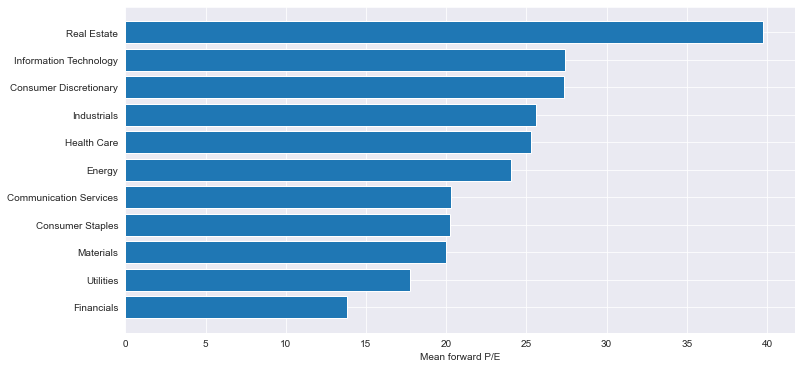

In [13]:
sns.set_style('darkgrid')

fig, ax = plt.subplots()
ax.barh(list(pes.index), pes)
fig.set_size_inches(12, 6)
ax.set_xlabel('Mean forward P/E')

### Figure 7: Index composition

In [14]:
index_composition = sp500.groupby('GICS Sector')['Market Cap (B)'].sum()
total_mkt_cap = index_composition.sum()
Weight = index_composition / total_mkt_cap * 100
Weight.sort_values(inplace=True)

Text(0.5, 0, '% of total index Mkt Cap')

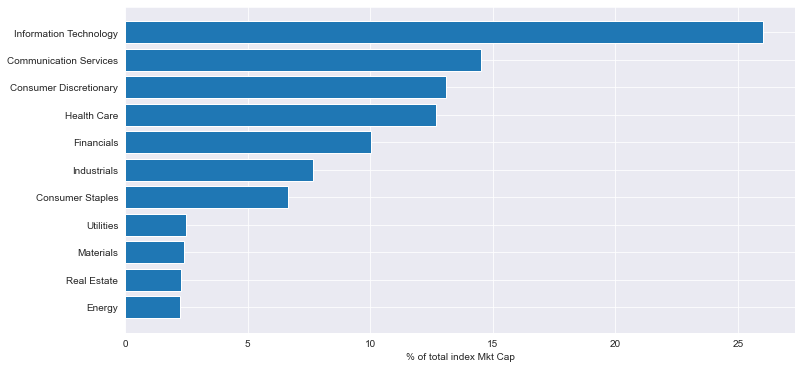

In [15]:
fig, ax = plt.subplots()
ax.barh(list(Weight.index), Weight)
fig.set_size_inches(12, 6)
ax.set_xlabel('% of total index Mkt Cap')

### Figure 8: HHI by sector

In [16]:
sector_mktcap = sp500.groupby('GICS Sector')['Market Cap (B)'].sum()
sector_df = pd.DataFrame(sector_mktcap)
sp500_sector = pd.merge(sp500, sector_df, how="inner", on=['GICS Sector'])
sp500_sector['sq'] = (sp500_sector['Market Cap (B)_x'] / sp500_sector['Market Cap (B)_y']) ** 2

In [17]:
hhi_sector = sp500_sector.groupby('GICS Sector')['sq'].sum()
hhi_sector.sort_values(inplace=True)

Text(0.5, 0, 'HHI')

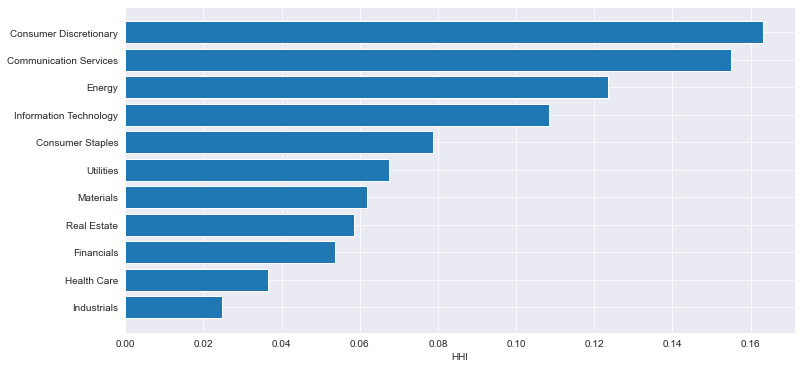

In [18]:
fig, ax = plt.subplots()
ax.barh(list(hhi_sector.index), hhi_sector)
fig.set_size_inches(12, 6)
ax.set_xlabel('HHI')